In [1]:
%display latex

In [2]:
var('B_b B_0 beta rho z r theta')

(B_b, B_0, beta, rho, z, r, theta)

In [3]:
Bz1=B_b+(B_0)*(1-beta*z)^(1/2)

In [4]:
phiz=-Bz1.integral(z)

In [5]:
phizt=phiz.taylor(z,0,75)

In [6]:
Phi=sum(r^(k)*legendre_P(k,cos(theta))*phizt.coefficient(z,k) for k in [0..72])

In [7]:
Br=-derivative(Phi,r) 
Bth=-((1/r)*derivative(Phi,theta))

In [8]:
Brho=Br*sin(theta)+Bth*cos(theta)
Bz=Br*cos(theta)-Bth*sin(theta)

In [9]:
Brho=Brho(r=sqrt(rho^2+z^2),theta=arctan(rho/z)) 
Bz=Bz(r=sqrt(rho^2+z^2),theta=arctan(rho/z))

In [10]:
from sage.ext.fast_eval import fast_float
Brho_num=fast_float(Brho,'B_b','B_0', 'beta','rho','z',old=True)
Bz_num=fast_float(Bz,'B_b','B_0', 'beta', 'rho','z',old=True)

In [11]:
import numpy as np
z_vals=np.arange(0,1.4,0.001)

In [21]:
Brho_f=[Brho_num(27.6,132.8,0.544,0,z) for z in z_vals]
Bz_f=[Bz_num(27.6,132.8,0.544,0,z) for z in z_vals]

In [22]:
import pylab as plt

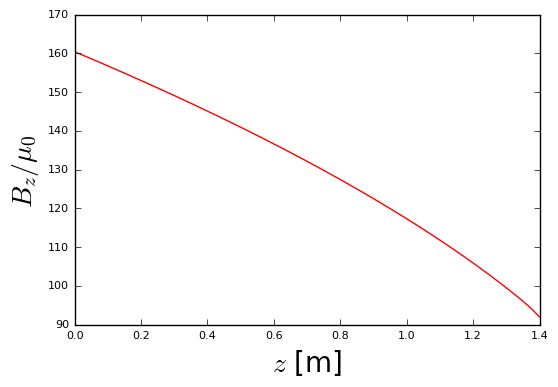

In [24]:
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)


plt.plot(z_vals,Bz_f,color='red')
plt.xlabel(r'$z$ [m]')
#plt.xlim((0.2, 1.3))
plt.ylabel(r'$B_z/\mu_{0}$ ')
#plt.ylim((0, 130))
plt.savefig('B_z ZC2.png', format='png', dpi=1000)
plt.show()